# CIFAR100 - Categorical Classification
> # Convolutional Neural Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# I. CIFAR100 Data_Set Load

In [3]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [4]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

> ## 2) One Hot Encoding

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_train.shape, y_test.shape

((50000, 100), (10000, 100))

# III. MNIST Keras Modeling

> ## 1) Model Define

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(128, kernel_size=(3,3), padding = 'same', activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu'))


#DNN
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=100, activation='softmax'))

> ## 2) Model Compile

* 모델 학습방법 설정

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

> ## 3) Model Fit

* 약 5분

In [37]:
%time

modelh = model.fit(X_train, y_train, 
                   epochs=100, 
                   batch_size = 128, 
                   validation_split = 0.2)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
Epoch 1/100
313/313 [==============================] - 38s 19ms/step - loss: 4.0593 - accuracy: 0.0851 - val_loss: 3.8559 - val_accuracy: 0.1192
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 3.4211 - accuracy: 0.1781 - val_loss: 3.3819 - val_accuracy: 0.1962
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 3.0578 - accuracy: 0.2375 - val_loss: 2.9261 - val_accuracy: 0.2762
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 2.7961 - accuracy: 0.2893 - val_loss: 2.9892 - val_accuracy: 0.2628
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 2.6098 - accuracy: 0.3257 - val_loss: 2.8482 - val_accuracy: 0.2889
Epoch 6/100
313/313 [==============================] - 6s 18ms/step - loss: 2.4606 - accuracy: 0.3589 - val_loss: 2.4740 - val_accuracy: 0.3575
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - l

> ## 4) 학습 결과 시각화

* Loss Visualization

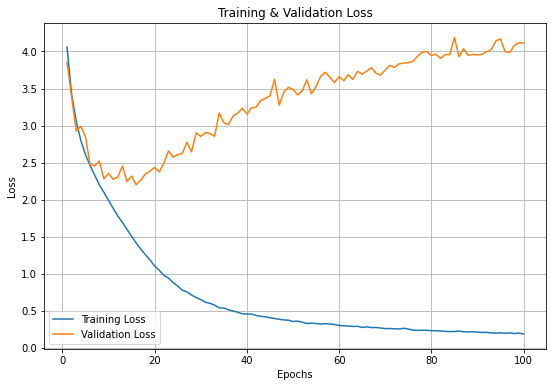

In [43]:
import matplotlib.pyplot as plt

epochs = range(1, len(modelh.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, modelh.history['loss'])
plt.plot(epochs, modelh.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 4.1700 - accuracy: 0.4197
Loss = 4.17003
Accuracy = 0.41970


# 
# 
# 
# The End
# 
# 
# 